In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
df = pd.read_csv('data/Algerian_forest_fires_dataset_cleaned.csv')

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [96]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [97]:
## Encoding

# df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

# droping the classes feature
df.drop('Classes', axis=1, inplace=True)

In [98]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [99]:
## Independent and Dependent features

X = df.drop('FWI', axis = 1)
Y = df['FWI']

In [100]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [101]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=42
)

# Check shapes
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

Train shape: (182, 10) (182,)
Test shape: (61, 10) (61,)


In [102]:
## Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000


<Axes: >

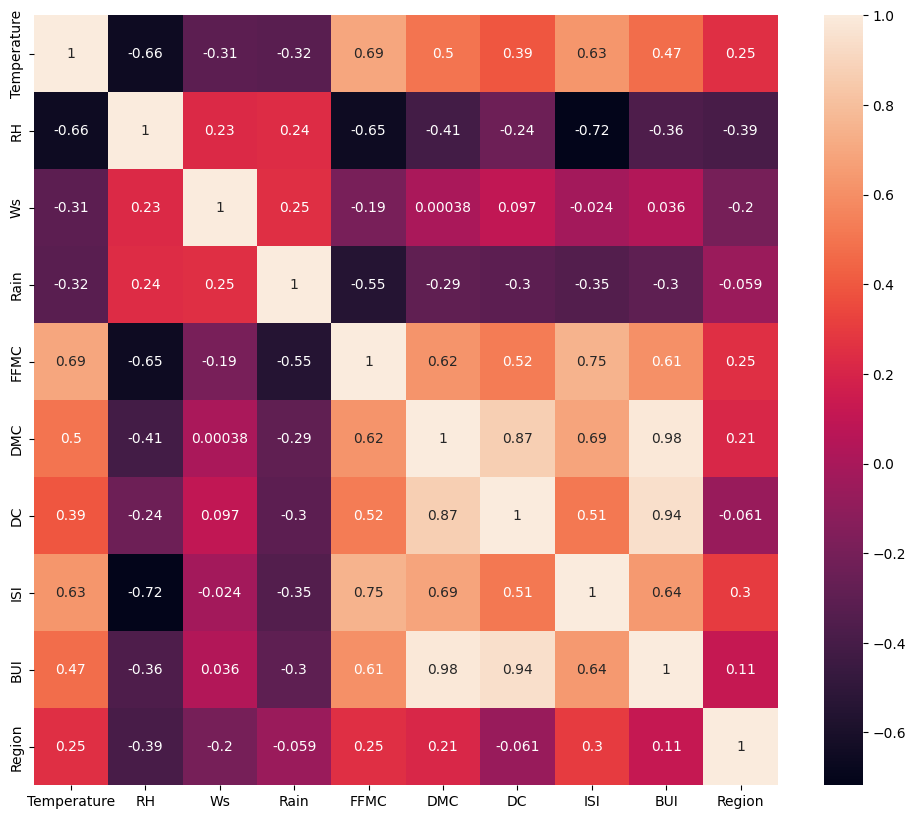

In [103]:

plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [104]:
def correlation(dataset, thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) > thresold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [105]:
corr_fts = correlation(X_train, 0.85)

In [106]:
## Droping the features
X_train.drop(corr_fts, axis=1, inplace=True)
X_test.drop(corr_fts, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

In [107]:
## Feature scaling - standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

print(X_train.shape)
print(len(scaler.mean_))

(182, 8)
8


Text(0.5, 1.0, 'X_train After Scaling')

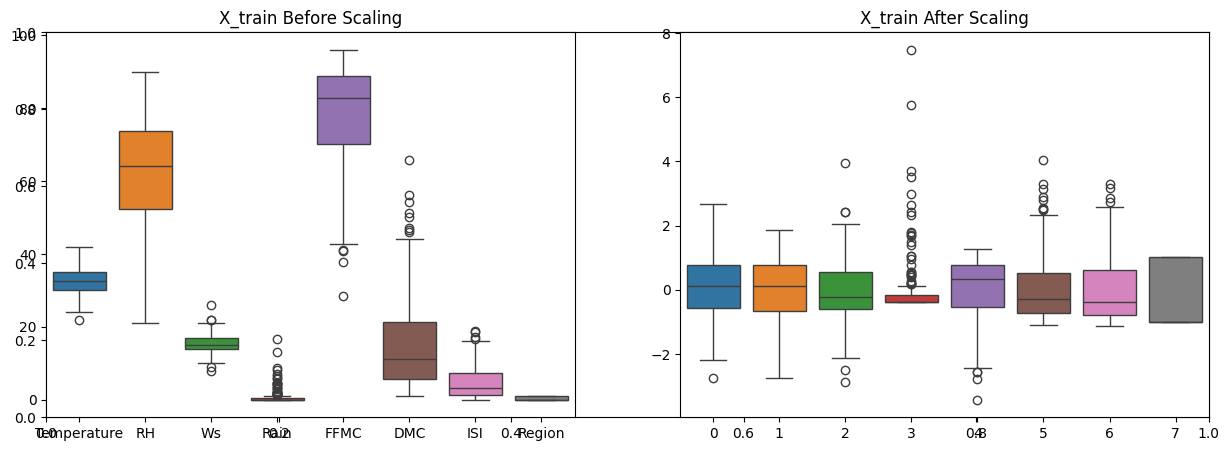

In [108]:
## Box plots to understand the effect of outliers
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_standard)
plt.title('X_train After Scaling')


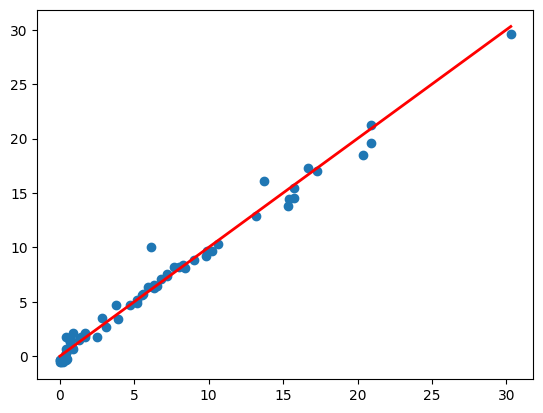

In [109]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_standard, y_train)
y_pred = linreg.predict(X_test_standard)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line

In [110]:
score

0.9830321384727897

In [111]:
mae

0.5806361642310046

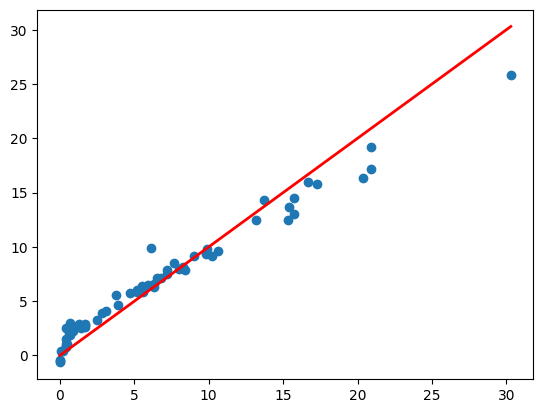

In [112]:
# Lasso regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lassoreg = Lasso()
lassoreg.fit(X_train_standard, y_train)
y_pred = lassoreg.predict(X_test_standard)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line

In [113]:
score

0.9492020263112388

In [114]:
mae

1.133175994914409

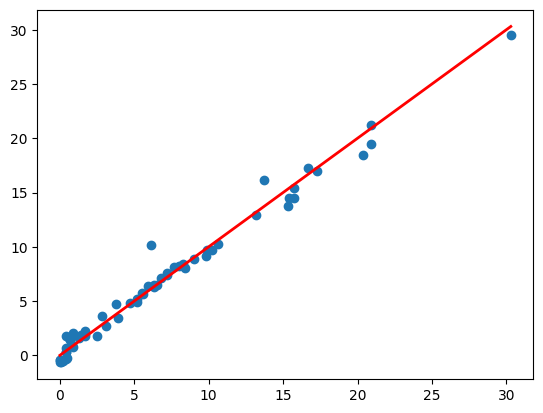

In [115]:
# Ridge regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridgereg = Ridge()
ridgereg.fit(X_train_standard, y_train)
y_pred = ridgereg.predict(X_test_standard)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line

In [116]:
score

0.9824907652592585

In [117]:
mae

0.5969613029130094

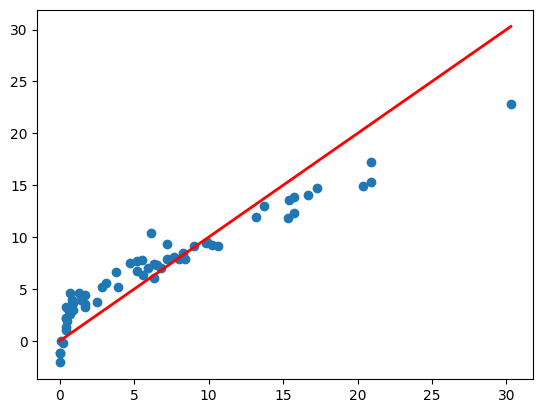

In [118]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elsreg = ElasticNet()
elsreg.fit(X_train_standard, y_train)
y_pred = elsreg.predict(X_test_standard)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line

In [119]:
score

0.868664603256521

In [120]:
mae

1.928441451179673

In [121]:
## Hyperparameter tuning

from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_standard, y_train)

LassoCV(cv=5)

In [122]:
lassocv.alpha_

0.049796533886308926

In [123]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [124]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

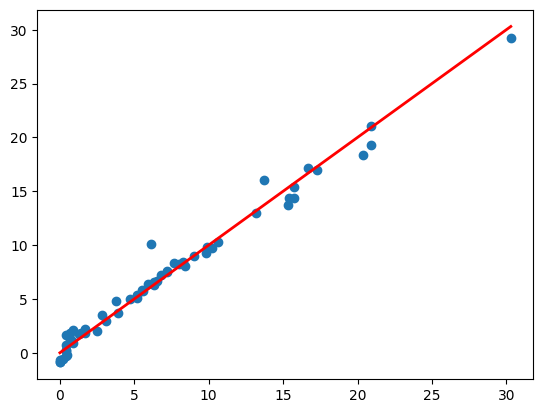

In [125]:
y_pred = lassocv.predict(X_test_standard)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

In [126]:
r2_score(y_pred, y_test)

0.9801414594534736

In [127]:
mean_absolute_error(y_test, y_pred)

0.6297839301098623

Mean absolute error: 0.5969613029130094
R2 score: 0.9814838121469553


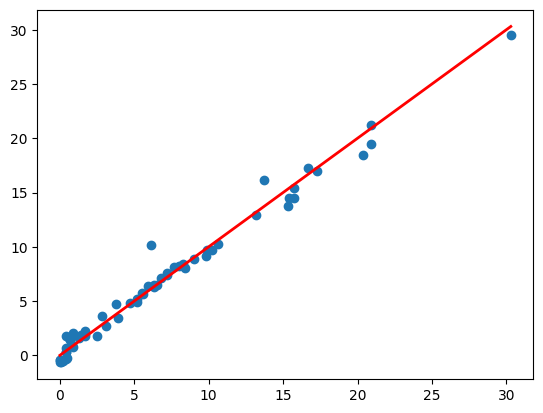

In [128]:
from sklearn.linear_model import RidgeCV
ridgecv  = RidgeCV(cv = 5)
ridgecv.fit(X_train_standard, y_train)
y_pred = ridgecv.predict(X_test_standard)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
print(f"Mean absolute error: {mean_absolute_error(y_pred, y_test)}")
print(f"R2 score: {r2_score(y_pred, y_test)}")

In [129]:
ridgecv.alpha_, ridgecv.alphas

(1.0, (0.1, 1.0, 10.0))

Mean absolute error: 0.6716732201553719
R2 score: 0.9779395215668777


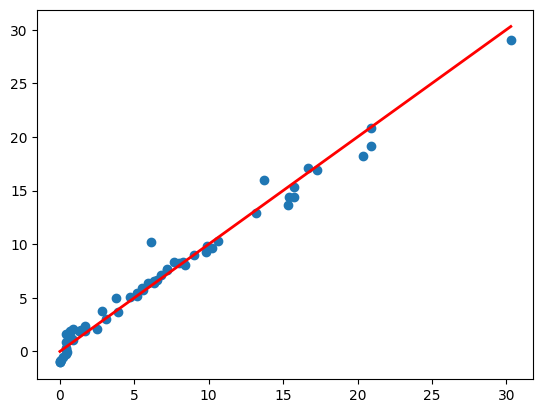

In [130]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv  = ElasticNetCV(cv = 5)
elasticnetcv.fit(X_train_standard, y_train)
y_pred = elasticnetcv.predict(X_test_standard)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
print(f"Mean absolute error: {mean_absolute_error(y_pred, y_test)}")
print(f"R2 score: {r2_score(y_pred, y_test)}")

In [132]:
import pickle
pickle.dump(scaler, open("models/scaler.pkl", mode="wb"))
pickle.dump(ridgereg, open("models/ridge.pkl", mode="wb"))